In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Load the data and explore it!

In [171]:
df = pd.read_csv(str(Path(r'./Data/BS_training.csv')))

In [172]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [173]:
len(df)

300000

In [174]:
df=df.sample(frac=30000/300000.0)

In [175]:
len(df)

30000

In [176]:
df['Stock Price'] = df['Stock Price'] / df['Strike Price']
df['Call Price'] = df['Call Price'] / df['Strike Price']
df['Strike Price'] = df['Strike Price'] / df['Strike Price']

In [177]:
df.head()

Stock Price  Strike Price  Maturity  Dividends  Volatility  Risk-free  \
195746     0.817411           1.0  2.175342   0.002682    0.208146   0.048203   
170930     1.347587           1.0  1.816438   0.009824    0.804841   0.033952   
249402     0.923804           1.0  2.745205   0.025334    0.058870   0.097671   
4048       1.013017           1.0  1.438356   0.007692    0.477727   0.033592   
264835     1.337654           1.0  2.336986   0.024381    0.889555   0.082856   

        Call Price  
195746    0.066326  
170930    0.679252  
249402    0.101159  
4048      0.245719  
264835    0.766916

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 195746 to 114281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock Price   30000 non-null  float64
 1   Strike Price  30000 non-null  float64
 2   Maturity      30000 non-null  float64
 3   Dividends     30000 non-null  float64
 4   Volatility    30000 non-null  float64
 5   Risk-free     30000 non-null  float64
 6   Call Price    30000 non-null  float64
dtypes: float64(7)
memory usage: 1.8 MB


In [179]:
df.describe().transpose()

count      mean       std           min       25%       50%  \
Stock Price   30000.0  1.030882  0.186057  7.692335e-01  0.867703  0.998893   
Strike Price  30000.0  1.000000  0.000000  1.000000e+00  1.000000  1.000000   
Maturity      30000.0  1.495997  0.864876  2.739726e-03  0.747945  1.487671   
Dividends     30000.0  0.015039  0.008646  3.185679e-07  0.007558  0.015084   
Volatility    30000.0  0.474964  0.246884  5.000778e-02  0.259098  0.476032   
Risk-free     30000.0  0.054775  0.025921  1.000161e-02  0.032407  0.054920   
Call Price    30000.0  0.266404  0.179106  0.000000e+00  0.119825  0.249812   

                   75%       max  
Stock Price   1.175450  1.428541  
Strike Price  1.000000  1.000000  
Maturity      2.241096  2.997260  
Dividends     0.022551  0.030000  
Volatility    0.690255  0.899902  
Risk-free     0.077020  0.099994  
Call Price    0.389308  0.913984

We dont do any kind of EDA here, since the data is simulated and regular. Nothing to explore here!

### Split the data into test-train

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X = df.drop('Call Price', axis=1).values
y = df['Call Price'].values

In [182]:
X.shape, y.shape

((30000, 6), (30000,))

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale the data

In [184]:
from sklearn.preprocessing import MinMaxScaler

In [185]:
scaler = MinMaxScaler()

In [186]:
#scaler.fit(X_train)

In [187]:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [192]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(6,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse')

In [193]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_51 (Dense)             (None, 40)                280       
_________________________________________________________________
dense_52 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_53 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 21        
Total params: 2,803
Trainable params: 2,803
Non-trainable params: 0
_________________________________________________________________


In [194]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [195]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=100, 
          callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 1s 35us/sample - loss: 0.0022 - val_loss: 2.8541e-04
Epoch 2/100
24000/24000 [==============================] - 0s 16us/sample - loss: 1.6971e-04 - val_loss: 1.7972e-04
Epoch 3/100
24000/24000 [==============================] - 0s 16us/sample - loss: 1.5076e-04 - val_loss: 1.7447e-04
Epoch 4/100
24000/24000 [==============================] - 0s 16us/sample - loss: 1.3975e-04 - val_loss: 1.4264e-04
Epoch 5/100
24000/24000 [==============================] - 0s 15us/sample - loss: 1.2479e-04 - val_loss: 1.0596e-04
Epoch 6/100
24000/24000 [==============================] - 0s 16us/sample - loss: 1.1055e-04 - val_loss: 8.6726e-05
Epoch 7/100
24000/24000 [==============================] - 0s 15us/sample - loss: 1.0601e-04 - val_loss: 8.8007e-05
Epoch 8/100
24000/24000 [==============================] - 0s 15us/sample - loss: 1.0369e-04 - val_loss: 7.2145e-05
Epoch 9/100
24000/24000 [==

24000/24000 [==============================] - 0s 15us/sample - loss: 1.2841e-05 - val_loss: 1.1868e-05
Epoch 71/100
24000/24000 [==============================] - 0s 16us/sample - loss: 1.8598e-05 - val_loss: 2.6035e-05
Epoch 72/100
24000/24000 [==============================] - 0s 16us/sample - loss: 1.3851e-05 - val_loss: 1.1204e-05
Epoch 73/100
24000/24000 [==============================] - 0s 15us/sample - loss: 1.4406e-05 - val_loss: 1.7230e-05
Epoch 74/100
24000/24000 [==============================] - 0s 15us/sample - loss: 1.3472e-05 - val_loss: 2.7825e-05
Epoch 75/100
24000/24000 [==============================] - 0s 15us/sample - loss: 1.4871e-05 - val_loss: 7.4754e-06
Epoch 76/100
24000/24000 [==============================] - 0s 16us/sample - loss: 1.1565e-05 - val_loss: 7.1744e-06
Epoch 77/100
24000/24000 [==============================] - 0s 15us/sample - loss: 1.5674e-05 - val_loss: 3.9635e-05
Epoch 78/100
24000/24000 [==============================] - 0s 15us/sample - 

### Evaluating the model

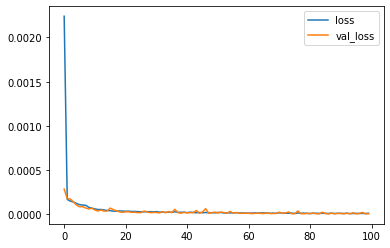

In [196]:
pd.DataFrame(model.history.history).plot()

In [197]:
y_pred_train = model.predict(x=X_train)

In [198]:
y_train_results = pd.concat([pd.Series(y_pred_train.reshape(y_train.shape), name='y_pred'), 
                             pd.Series(y_train, name='y_true')], 
                            axis=1)

In [199]:
y_train_results.head()

y_pred    y_true
0  0.376538  0.377541
1  0.325500  0.324161
2  0.246734  0.253823
3  0.208641  0.209414
4  0.346011  0.347020

In [200]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [201]:
y_predicted = model.predict(X_test).reshape(y_test.shape)

In [202]:
mean_absolute_error(y_true=y_test, y_pred=y_predicted)

0.0019962912707463913

In [204]:
mean_squared_error(y_true=y_test, y_pred=y_predicted)

7.004938183150339e-06

In [205]:
y_df = pd.concat([pd.Series(y_test, name='y_true'), pd.Series(y_predicted, name='y_pred')], axis=1)

In [206]:
y_df

y_true    y_pred
0     0.175531  0.177384
1     0.103601  0.104202
2     0.376869  0.383250
3     0.351353  0.357397
4     0.048627  0.048190
...        ...       ...
5995  0.388945  0.388959
5996  0.285500  0.285509
5997  0.446342  0.447372
5998  0.419554  0.417331
5999  0.480938  0.482125

[6000 rows x 2 columns]

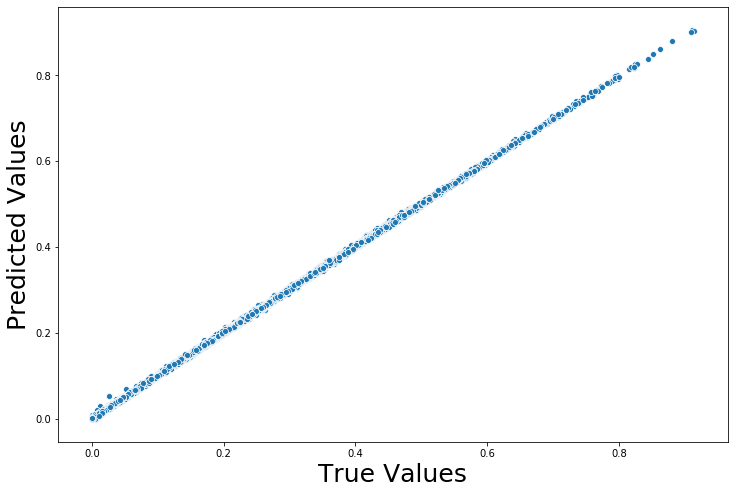

In [207]:
plt.figure(figsize=(12,8))
a = sns.scatterplot(y_test, y_predicted, legend='full')
a.set_xlabel('True Values', fontsize=25)
_ = a.set_ylabel('Predicted Values', fontsize=25)

Text(0.5, 0, 'Error(True-Predicted)')

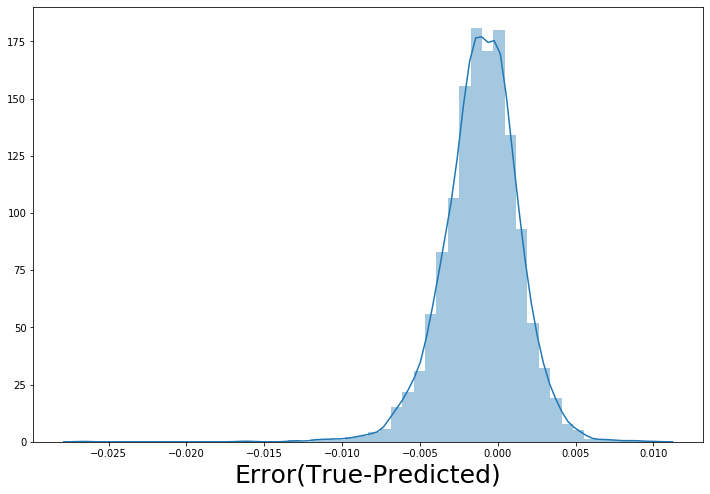

In [208]:
plt.figure(figsize=(12,8))
b = sns.distplot(pd.Series(y_test-y_predicted, name="Error(True-Predicted)"))
b.set_xlabel('Error(True-Predicted)', fontsize=25)
# _ = b.set_ylabel('# of Instances', fontsize=25)

### Save the model

In [165]:
model.save(r'C:\Ankit\PythonProjects\hackathon\DeepLearning\5ksamples.h5', save_format='tf')

In [167]:
from tensorflow.keras.models import load_model

In [168]:
later_model = load_model(r'C:\Ankit\PythonProjects\hackathon\DeepLearning\5ksamples.h5', compile=False)

In [33]:
later_model.predict(X_test).reshape(y_test.shape)

array([0.26783845, 0.3217547 , 0.00570326, ..., 0.6660765 , 0.5195066 ,
       0.4476939 ], dtype=float32)

In [34]:
y_predicted

array([0.26783845, 0.3217547 , 0.00570326, ..., 0.6660765 , 0.5195066 ,
       0.4476939 ], dtype=float32)

In [35]:
X_test.shape

(60000, 6)

In [36]:
X_test[0].shape

(6,)

In [37]:
X_test[0:1]

array([[0.7821705 , 1.        , 2.52328767, 0.00792332, 0.67824267,
        0.01849439]])

In [38]:
df.head()

Stock Price  Strike Price  Maturity  Dividends  Volatility  Risk-free  \
0     1.062237           1.0  1.093151   0.005674    0.862692   0.058898   
1     1.076500           1.0  0.843836   0.020428    0.759562   0.080634   
2     0.849812           1.0  1.326027   0.019181    0.606436   0.042031   
3     0.904815           1.0  0.791781   0.028475    0.572696   0.036566   
4     0.859547           1.0  0.501370   0.009074    0.090578   0.044426   

   Call Price  
0    0.408642  
1    0.337843  
2    0.187719  
3    0.146312  
4    0.000397

In [39]:
later_model.predict(np.array([1.062237, 1.0, 1.093151, 0.005674, 0.862692, 0.058898]).reshape((1,6)))

array([[0.40613532]], dtype=float32)

In [46]:
later_model.predict(np.array([1.0, 1.0, 1, 0.0, 0.2, 0.0]).reshape((1,6)))

array([[0.0799723]], dtype=float32)

In [50]:
df[(df['Stock Price'] > 0.49) & (df['Stock Price'] < 0.51)]

Empty DataFrame
Columns: [Stock Price, Strike Price, Maturity, Dividends, Volatility, Risk-free, Call Price]
Index: []

In [56]:
df['Stock Price'].describe()

count    300000.000000
mean          1.031697
std           0.185779
min           0.769231
25%           0.868780
50%           0.999826
75%           1.176731
max           1.428564
Name: Stock Price, dtype: float64